In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
        subset='all', 
        categories=['alt.atheism', 'sci.space']
)
print "Done"

Done


In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = pd.Series(newsgroups.target)
print "Done"

Done


In [5]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(y.size, n_folds=2, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv, verbose=1)
gs.fit(X, y)
best_clf = gs.best_estimator_
print "Done"

Fitting 2 folds for each of 11 candidates, totalling 22 fits
Done

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   37.4s finished


In [5]:
# persist the model for future use without having to retrain
from sklearn.externals import joblib
joblib.dump(best_clf, 'best_clf.pkl')

['best_clf.pkl',
 'best_clf.pkl_01.npy',
 'best_clf.pkl_02.npy',
 'best_clf.pkl_03.npy',
 'best_clf.pkl_04.npy',
 'best_clf.pkl_05.npy',
 'best_clf.pkl_06.npy',
 'best_clf.pkl_07.npy',
 'best_clf.pkl_08.npy',
 'best_clf.pkl_09.npy',
 'best_clf.pkl_10.npy',
 'best_clf.pkl_11.npy',
 'best_clf.pkl_12.npy',
 'best_clf.pkl_13.npy',
 'best_clf.pkl_14.npy',
 'best_clf.pkl_15.npy',
 'best_clf.pkl_16.npy',
 'best_clf.pkl_17.npy']

In [119]:
# load model
best_clf = joblib.load('best_clf.pkl')

1.0

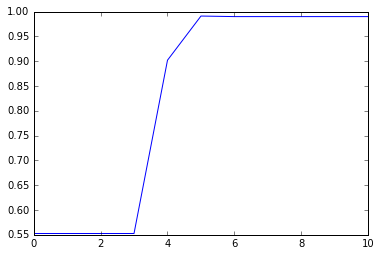

In [6]:
# анализ значения качества для всех значений параметров
cross_score = []
parameters = []
for a in gs.grid_scores_:
    cross_score.append(a.mean_validation_score) # оценка качества по кросс-валидации
    parameters.append(a.parameters) # значения параметров
plt.plot(cross_score);

In [7]:
# max grid parameter
W = dict(zip(grid['C'], cross_score))
max(W, key=W.get)

1.0

In [10]:
# best parameters
# to series
coef = best_clf.coef_.toarray().tolist()[0]
coef = pd.Series(coef)

# take absolute
coef = coef.abs()
coef = coef.sort_values(ascending=False)
# no abs param value
# 24019,17802,23673,22936,18158,9043,16027,12503,6685,11072
ten_top_id = coef.index[range(10)]

In [11]:
# words
# space,god,atheism,atheists,moon,sky,religion,bible,keith,sci
feature_names = pd.Series(vectorizer.get_feature_names())
feature_names[ten_top_id]

24019       space
12871         god
5088      atheism
5093     atheists
17802        moon
23673         sky
21850    religion
5776        bible
15606       keith
22936         sci
dtype: object